In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
#Loading the data
df = pd.read_csv('realtor-data.csv')

In [5]:
# Drop all rows with missing values to ensure clean and complete data for modeling
df = df.dropna()
# Display the number of missing (NaN) values in each column of the dataset
print(df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [6]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 502 to 39152
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     10461 non-null  float64
 1   status          10461 non-null  object 
 2   price           10461 non-null  float64
 3   bed             10461 non-null  float64
 4   bath            10461 non-null  float64
 5   acre_lot        10461 non-null  float64
 6   street          10461 non-null  float64
 7   city            10461 non-null  object 
 8   state           10461 non-null  object 
 9   zip_code        10461 non-null  float64
 10  house_size      10461 non-null  float64
 11  prev_sold_date  10461 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.3+ MB


In [8]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,10461.000000,1.046100e+04,10461.000000,10461.000000,10461.000000,1.046100e+04,10461.000000,10461.000000
mean,51990.958608,6.607748e+05,3.633687,2.537138,4.184201,9.412485e+05,4654.701367,2202.781856
std,32829.905595,1.251408e+06,1.506782,1.404405,184.844787,5.150186e+05,2618.915266,1452.125414
min,84.000000,1.000000e+04,1.000000,1.000000,0.000000,5.596000e+03,802.000000,170.000000
25%,22611.000000,2.749000e+05,3.000000,2.000000,0.170000,5.090050e+05,2638.000000,1314.000000
50%,51868.000000,3.990000e+05,3.000000,2.000000,0.350000,9.509250e+05,4401.000000,1820.000000
75%,80562.000000,6.490000e+05,4.000000,3.000000,1.000000,1.382451e+06,6360.000000,2638.000000
max,110138.000000,6.000000e+07,33.000000,33.000000,18817.000000,1.969988e+06,12998.000000,21433.000000


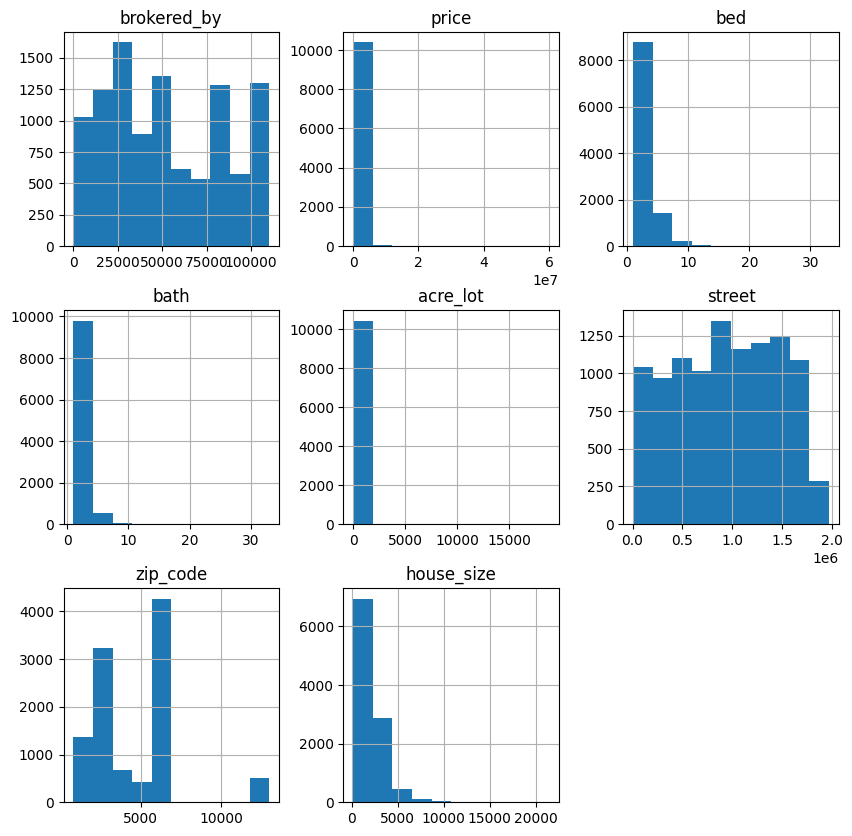

In [9]:
df.hist(figsize=(10, 10))
plt.show()

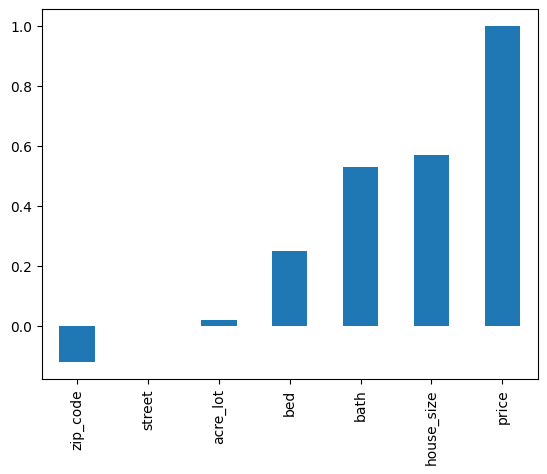

In [10]:
corr = df.corr(numeric_only=True).round(2)
corr['price'][1:].sort_values().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Frequency')

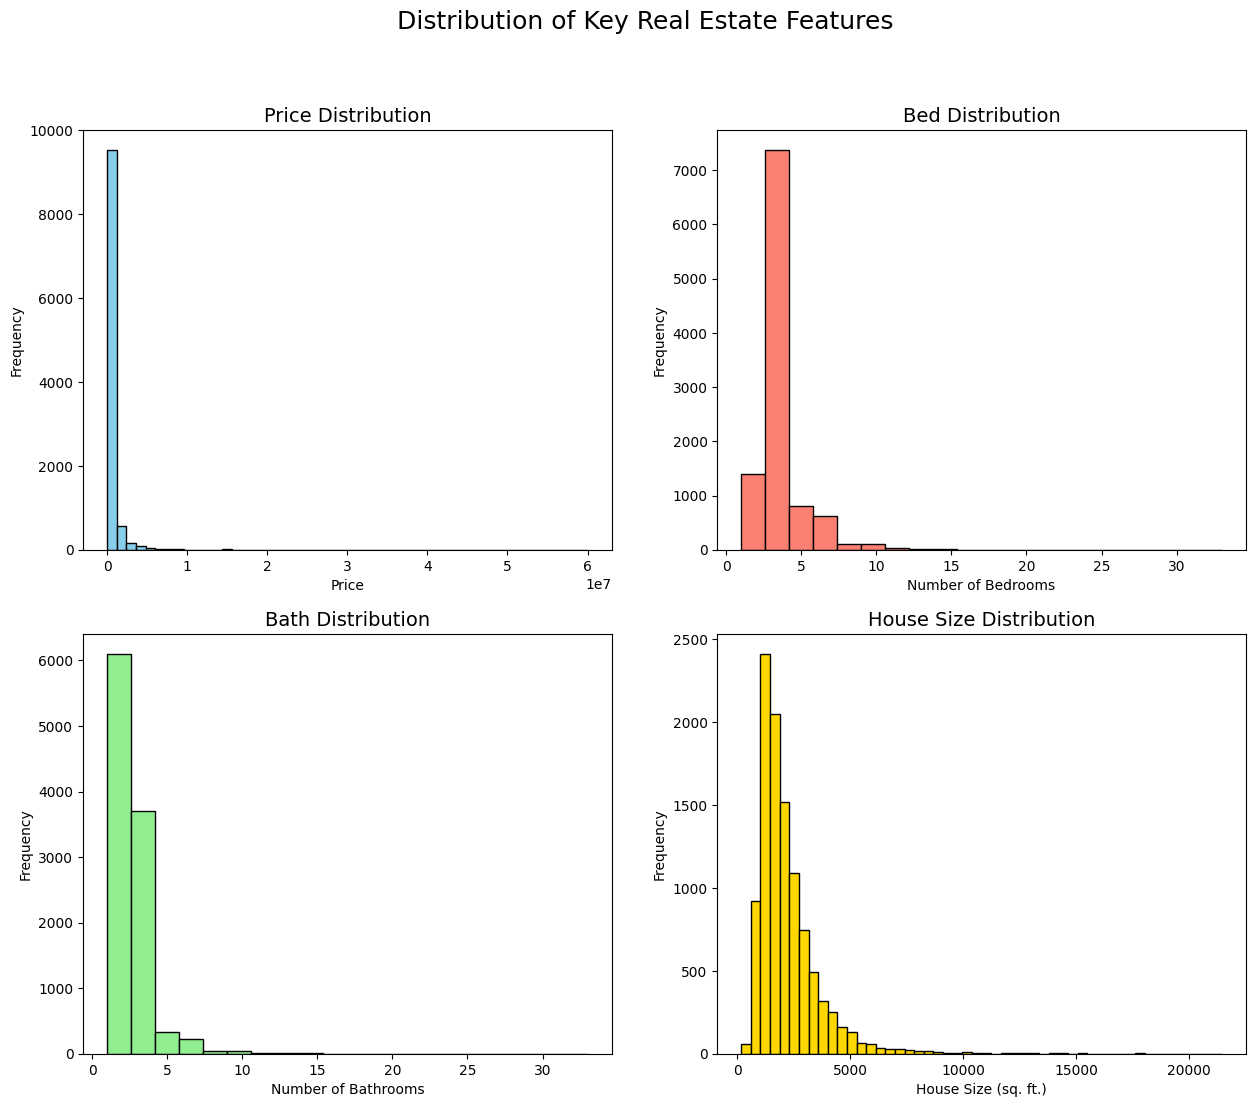

In [11]:
# Create a figure and a 2x2 grid of subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution of Key Real Estate Features', fontsize=18)

# Plot histograms on each subplot
axes[0, 0].hist(df['price'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['bed'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Bed Distribution', fontsize=14)
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['bath'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Bath Distribution', fontsize=14)
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['house_size'], bins=50, color='gold', edgecolor='black')
axes[1, 1].set_title('House Size Distribution', fontsize=14)
axes[1, 1].set_xlabel('House Size (sq. ft.)')
axes[1, 1].set_ylabel('Frequency')

In [12]:
#Describe price baseline
print(df['price'].describe().round(2))

count       10461.00
mean       660774.77
std       1251407.63
min         10000.00
25%        274900.00
50%        399000.00
75%        649000.00
max      60000000.00
Name: price, dtype: float64


In [13]:
#Create price categories
bins = [0, 200000, 500000, 1000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Luxury']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

print(df['price_category'].value_counts())

price_category
Medium    5587
High      2548
Low       1190
Luxury    1136
Name: count, dtype: int64


In [14]:
# Copy dataset
df_encoded = df.copy()

# Label encode high-cardinality columns
label_cols = ['city', 'state', 'street']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode small categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['status'], drop_first=True)

# Features & target
X = df_encoded.drop(['price', 'prev_sold_date', 'price_category'], axis=1)
y = df_encoded['price_category']

In [15]:
#Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
#Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train Logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
#Evaluate
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6430960344003822
              precision    recall  f1-score   support

        High       0.55      0.41      0.47       510
         Low       0.62      0.12      0.20       238
      Luxury       0.76      0.40      0.52       227
      Medium       0.66      0.91      0.76      1118

    accuracy                           0.64      2093
   macro avg       0.65      0.46      0.49      2093
weighted avg       0.64      0.64      0.60      2093



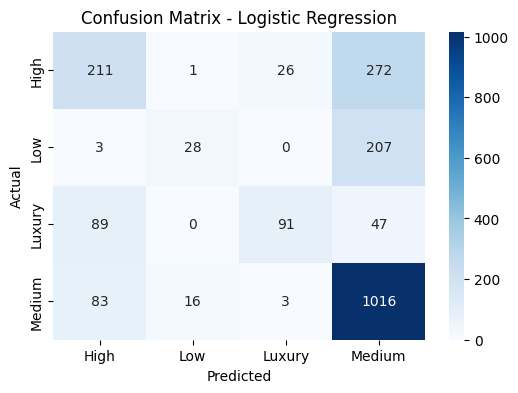

In [19]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()